# Heart Disease

## ETL (Extract Load Transform)

In [1]:
import pandas as pd
import numpy as np

In [2]:
heart_df = pd.read_csv("heart_statlog_cleveland_hungary_final.csv")
heart_df.head(5)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [3]:
heart_df.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [4]:
for column in heart_df.columns:
    if " " in column:
        column_1 = column.replace(" ","_")
        heart_df.rename(columns = {column:column_1}, inplace = True)
heart_df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_bp_s', 'cholesterol',
       'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate',
       'exercise_angina', 'oldpeak', 'ST_slope', 'target'],
      dtype='object')

In [5]:
heart_df.head()

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [6]:
heart_df.count(axis=0)

age                    1190
sex                    1190
chest_pain_type        1190
resting_bp_s           1190
cholesterol            1190
fasting_blood_sugar    1190
resting_ecg            1190
max_heart_rate         1190
exercise_angina        1190
oldpeak                1190
ST_slope               1190
target                 1190
dtype: int64

In [7]:
heart_df['target'] = heart_df['target'].map({0:float(0), 1:float(1)})

## Data correlation

In [8]:
heart_df.corr()

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,target
age,1.000000,0.015096,0.149055,0.257692,-0.046472,0.178923,0.194595,-0.368676,0.188095,0.245093,0.237749,0.262029
sex,0.015096,1.000000,0.138405,-0.006443,-0.208441,0.110961,-0.022225,-0.181837,0.194380,0.096390,0.127913,0.311267
chest_pain_type,0.149055,0.138405,1.000000,0.009466,-0.109396,0.076492,0.035705,-0.337491,0.403428,0.224106,0.276949,0.460127
resting_bp_s,0.257692,-0.006443,0.009466,1.000000,0.099037,0.088235,0.095860,-0.101357,0.142435,0.176111,0.089384,0.121415
cholesterol,-0.046472,-0.208441,-0.109396,0.099037,1.000000,-0.239778,0.150879,0.238028,-0.033261,0.057451,-0.100053,-0.198366
fasting_blood_sugar,0.178923,0.110961,0.076492,0.088235,-0.239778,1.000000,0.032124,-0.118689,0.053053,0.031193,0.145902,0.216695
resting_ecg,0.194595,-0.022225,0.035705,0.095860,0.150879,0.032124,1.000000,0.058812,0.037821,0.126023,0.093629,0.073059
max_heart_rate,-0.368676,-0.181837,-0.337491,-0.101357,0.238028,-0.118689,0.058812,1.000000,-0.377691,-0.183688,-0.350750,-0.413278
exercise_angina,0.188095,0.194380,0.403428,0.142435,-0.033261,0.053053,0.037821,-0.377691,1.000000,0.370772,0.393408,0.481467
oldpeak,0.245093,0.096390,0.224106,0.176111,0.057451,0.031193,0.126023,-0.183688,0.370772,1.000000,0.524639,0.398385


## Feature Engineering

In [9]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

In [10]:
spark = SparkSession.builder.appName("Capstone Project").getOrCreate()

In [11]:
spark_df = spark.createDataFrame(heart_df)

In [12]:
spark_df.show(10)

+---+---+---------------+------------+-----------+-------------------+-----------+--------------+---------------+-------+--------+------+
|age|sex|chest_pain_type|resting_bp_s|cholesterol|fasting_blood_sugar|resting_ecg|max_heart_rate|exercise_angina|oldpeak|ST_slope|target|
+---+---+---------------+------------+-----------+-------------------+-----------+--------------+---------------+-------+--------+------+
| 40|  1|              2|         140|        289|                  0|          0|           172|              0|    0.0|       1|   0.0|
| 49|  0|              3|         160|        180|                  0|          0|           156|              0|    1.0|       2|   1.0|
| 37|  1|              2|         130|        283|                  0|          1|            98|              0|    0.0|       1|   0.0|
| 48|  0|              4|         138|        214|                  0|          0|           108|              1|    1.5|       2|   1.0|
| 54|  1|              3|         

In [13]:
from pyspark.ml.feature import OneHotEncoder as ohe

enc1 = ohe(inputCol = 'sex', outputCol = 'sexvec')
enc2 = ohe(inputCol = 'chest_pain_type', outputCol = 'cptvec')
enc3 = ohe(inputCol = 'fasting_blood_sugar', outputCol = 'fbsvec')
enc4 = ohe(inputCol = 'resting_ecg', outputCol = 'revec')
enc5 = ohe(inputCol = 'exercise_angina', outputCol = 'eavec')
enc6 = ohe(inputCol = 'ST_slope', outputCol = 'stsvec')

In [14]:
from pyspark.ml.feature import VectorAssembler as vecas, MinMaxScaler as mimasc, PCA

va = vecas(inputCols = ['age','sexvec','cptvec','resting_bp_s','cholesterol','fbsvec','revec','max_heart_rate','oldpeak','eavec','stsvec'], outputCol = 'vector')
mms = mimasc(inputCol = 'vector', outputCol = 'features')
pca = PCA(k=3, inputCol = 'features', outputCol = 'feature')

In [15]:
from pyspark.ml import Pipeline as pipe

pl = pipe(stages=[enc1,enc2,enc3,enc4,enc5,enc6,va,mms,pca])
normal_df = pl.fit(spark_df).transform(spark_df)
normal_df.show(5)

+---+---+---------------+------------+-----------+-------------------+-----------+--------------+---------------+-------+--------+------+-------------+-------------+-------------+-------------+-------------+-------------+--------------------+--------------------+--------------------+
|age|sex|chest_pain_type|resting_bp_s|cholesterol|fasting_blood_sugar|resting_ecg|max_heart_rate|exercise_angina|oldpeak|ST_slope|target|       sexvec|       cptvec|       fbsvec|        revec|        eavec|       stsvec|              vector|            features|             feature|
+---+---+---------------+------------+-----------+-------------------+-----------+--------------+---------------+-------+--------+------+-------------+-------------+-------------+-------------+-------------+-------------+--------------------+--------------------+--------------------+
| 40|  1|              2|         140|        289|                  0|          0|           172|              0|    0.0|       1|   0.0|    (1,[

In [16]:
for column in normal_df.columns:
    if column == 'feature' or column == 'target':
        print(column)
    else:
        normal_df = normal_df.drop(column)
normal_df.show(5)

target
feature
+------+--------------------+
|target|             feature|
+------+--------------------+
|   0.0|[1.52628837764795...|
|   1.0|[0.31050178905218...|
|   0.0|[1.24508802722820...|
|   1.0|[-0.2258366145049...|
|   0.0|[1.31629073015470...|
+------+--------------------+
only showing top 5 rows



In [17]:
normal_df.show()

+------+--------------------+
|target|             feature|
+------+--------------------+
|   0.0|[1.52628837764795...|
|   1.0|[0.31050178905218...|
|   0.0|[1.24508802722820...|
|   1.0|[-0.2258366145049...|
|   0.0|[1.31629073015470...|
|   0.0|[1.38652218744027...|
|   0.0|[1.65721538515610...|
|   0.0|[1.47989165365669...|
|   1.0|[-0.3331757535176...|
|   0.0|[1.61495873321384...|
|   0.0|[1.50222030351402...|
|   1.0|[-0.3954462456268...|
|   0.0|[1.50416023686307...|
|   1.0|[-0.3379425636901...|
|   0.0|[1.26536496376417...|
|   0.0|[0.44442028558309...|
|   1.0|[0.12387383720815...|
|   0.0|[1.65558712008535...|
|   1.0|[0.05152695193941...|
|   1.0|[0.32530950299087...|
+------+--------------------+
only showing top 20 rows



## Machine Learning Training

In [18]:
splits = normal_df.randomSplit([0.7, 0.3])

In [19]:
df_train = splits[0]
df_test = splits[1]

In [20]:
from pyspark.ml.classification import GBTClassifier
gbt = GBTClassifier(featuresCol='feature', labelCol='target') 
train_data, test_data = normal_df.randomSplit([0.7, 0.3]) 
fit_model = gbt.fit(train_data)
results = fit_model.transform(test_data)
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
res = MulticlassClassificationEvaluator(predictionCol='prediction',labelCol='target', metricName='accuracy') 
result = res.evaluate(results)
result

0.8664850136239782

C:\Users\dhanu\anaconda3\Lib\site-packages\pyspark\sql\context.py:158: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


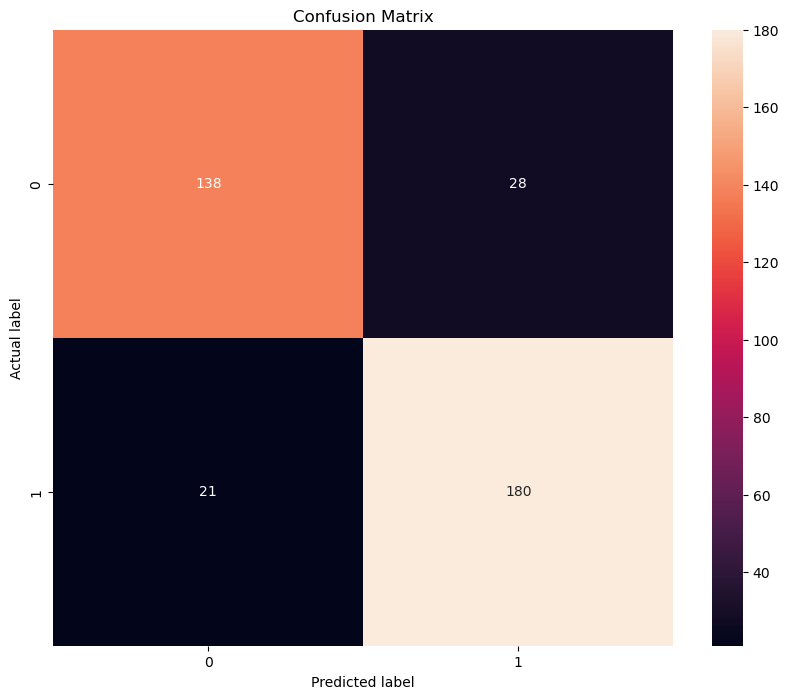

In [21]:
preds_and_label = results.select(['prediction', 'target']).rdd.map(tuple)
from pyspark.mllib.evaluation import MulticlassMetrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
metrics = MulticlassMetrics(preds_and_label)
confusion_matrix = metrics.confusionMatrix().toArray()
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [22]:
from pyspark.ml.classification import LogisticRegression
log_reg = LogisticRegression(featuresCol='feature', labelCol='target') 
train_data, test_data = normal_df.randomSplit([0.7, 0.3]) 
fit_model = log_reg.fit(train_data)
results = fit_model.transform(test_data)
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
res = MulticlassClassificationEvaluator(predictionCol='prediction',labelCol='target', metricName='accuracy') 
result = res.evaluate(results)
result

0.8235294117647058

C:\Users\dhanu\anaconda3\Lib\site-packages\pyspark\sql\context.py:158: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


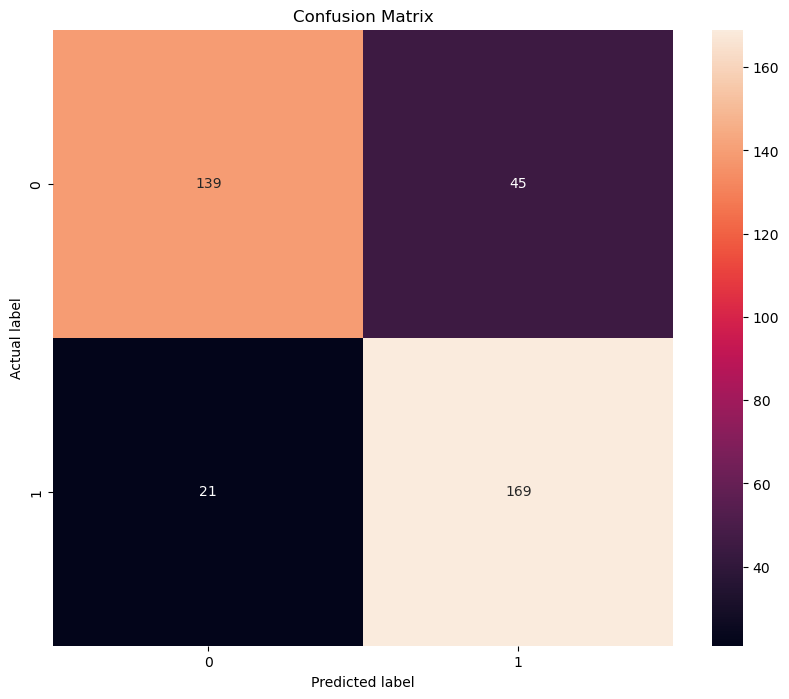

In [23]:
preds_and_label = results.select(['prediction', 'target']).rdd.map(tuple)
from pyspark.mllib.evaluation import MulticlassMetrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
metrics = MulticlassMetrics(preds_and_label)
confusion_matrix = metrics.confusionMatrix().toArray()
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [24]:
from pyspark.ml.classification import RandomForestClassifier
r = RandomForestClassifier(featuresCol = 'feature', labelCol = 'target')
train_data, test_data = normal_df.randomSplit([0.7, 0.3]) 
fit_model = r.fit(train_data)
results = fit_model.transform(test_data)
res = MulticlassClassificationEvaluator(predictionCol='prediction',labelCol='target', metricName='accuracy') 
result = res.evaluate(results)
result

0.8117283950617284

C:\Users\dhanu\anaconda3\Lib\site-packages\pyspark\sql\context.py:158: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


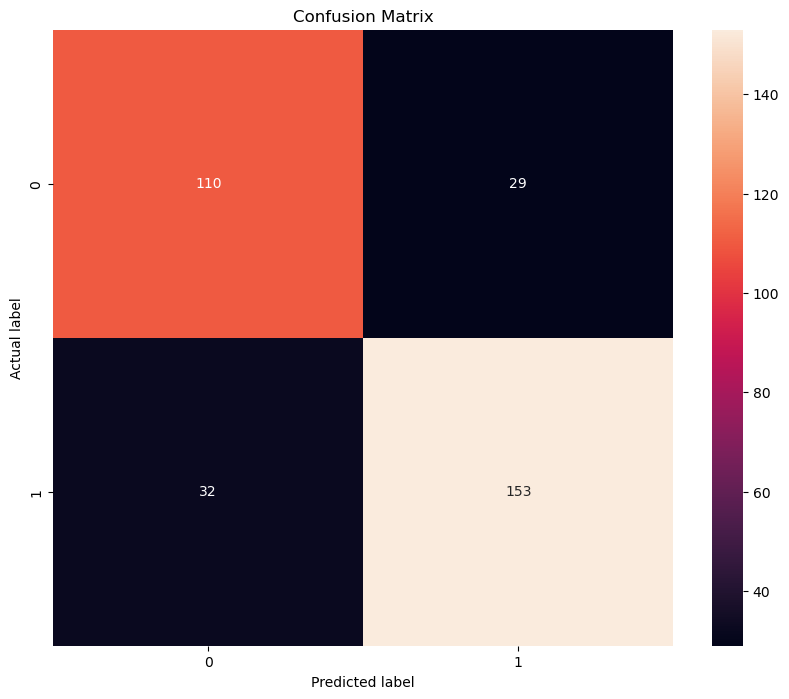

In [25]:
preds_and_label = results.select(['prediction', 'target']).rdd.map(tuple)
from pyspark.mllib.evaluation import MulticlassMetrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
metrics = MulticlassMetrics(preds_and_label)
confusion_matrix = metrics.confusionMatrix().toArray()
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## Deep Learning

In [26]:
def construct_arrays (df):
    # Initialize Input and Output arrays for the Data set
    X = []
    y = []
    
    # Convert dataframe from Spark DF to Pandas DF
    df_pd = df.toPandas()

    # Loop through dataframe and add data to input and output arrays
    for index, row in df_pd.iterrows():
        X.append(row[1])
        y.append(row[0])

    # Convery input and output data arrays from Python arrays to Numpy arrays
    X = np.array(X)
    y = np.array(y)
    
    return (X, y)

In [27]:
X_train, y_train = construct_arrays(df_train)
print("Size of Training Features dataset: ", len(X_train))
print(X_train)
print("Size of Training Label dataset: ", len(y_train))
print(y_train)

X_test, y_test = construct_arrays (df_test)
print("Size of Test Features dataset: ", len(X_test))
print(X_test)
print("Size of Test Label dataset: ", len(y_test))
print(y_test)

Size of Training Features dataset:  832
[[-0.36726859  1.11164998  0.1439276 ]
 [-0.28145222  1.10463512  0.88303402]
 [-0.20674326  1.13124956  0.48694021]
 ...
 [ 1.30277615  0.80360159  0.22505153]
 [ 1.35201243 -0.01803656 -0.01744402]
 [ 1.47290937  0.82918497 -0.1021499 ]]
Size of Training Label dataset:  832
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1

In [28]:
from keras.models import Sequential
from keras.layers import Dense


# Define a Multilayer Perceptron (MLP) Model using Keras
model = Sequential()
model.add(Dense(16, input_dim = 3, kernel_initializer = 'normal', activation = 'softmax')) # input Layer
model.add(Dense(1, kernel_initializer = 'normal', activation = 'sigmoid')) # Output Layer


# Compile our model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Train our model
model.fit(X_train, y_train, epochs = 100, batch_size = 17, verbose = 1, validation_data = (X_test, y_test))

# Evaluate our model
score = model.evaluate(X_test, y_test, verbose = 0)
print(score)

C:\Users\dhanu\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.4699 - loss: 0.6937 - val_accuracy: 0.5168 - val_loss: 0.6926
Epoch 2/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5551 - loss: 0.6918 - val_accuracy: 0.5168 - val_loss: 0.6916
Epoch 3/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5314 - loss: 0.6908 - val_accuracy: 0.5168 - val_loss: 0.6903
Epoch 4/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5221 - loss: 0.6894 - val_accuracy: 0.5168 - val_loss: 0.6882
Epoch 5/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5403 - loss: 0.6858 - val_accuracy: 0.5168 - val_loss: 0.6850
Epoch 6/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5315 - loss: 0.6825 - val_accuracy: 0.5168 - val_loss: 0.6802
Epoch 7/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5239 - loss: 0.6778 - val_accuracy: 0.5587 - val_loss: 0.6736
Epoch 8/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6008 - loss: 0.6672 - val_accuracy: 0.7514 - v

In [29]:
print("Accuracy of the validation model:", score[1])

Accuracy of the validation model: 0.8016759753227234
